In [1]:
import pandas as pd
import errno    
import os
import numpy as np
import math

from sklearn.metrics import r2_score
from scipy import stats

from sklearn.metrics import mean_squared_error

'''
Author: Enrico Ceccolini
    TODO
'''

datadir = "/datasets/eurora_data/db1/"

infile_jobs_to_nodes = datadir + "job_nodes.csv"

suffix = "_5sec_"
### select an interval from
## 1 settings wholeData
#interval_comment_whole = "WholeData"

### select an interval from
## 2 settings Andrea
interval_comment = "Andrea"
start_time = pd.to_datetime('2014-03-31')
end_time = pd.to_datetime('2014-05-01')
#infile_jobs = datadir + "april_long_jobs.csv"

## 3 settings Alina
#interval_comment = "Alina"
#start_time = pd.to_datetime('2014-06-30')
#end_time = pd.to_datetime('2014-11-01')

infile_long_jobs = datadir + "CPUs/" + interval_comment + "/" + interval_comment + "_long_jobs_real_pow"
#infile_short_jobs = datadir + "CPUs/" + interval_comment + "/" + interval_comment + "_short_jobs_real_pow"

In [2]:
jobs_to_nodes_whole_data = pd.read_csv(infile_jobs_to_nodes, index_col=0)
print("jobs_to_nodes_whole_data contains {} records".format(jobs_to_nodes_whole_data.shape[0]))

long_jobs = pd.read_csv(infile_long_jobs + ".csv", index_col=0)
print("There are {} long jobs in the {}'s interval".format(long_jobs.shape[0], interval_comment))

### clean the data
# remove jobs runned on the inexistent node 129
jobs_to_nodes_whole_data = jobs_to_nodes_whole_data[jobs_to_nodes_whole_data['node_id'] != 129] 
# remove jobs with the same id that runned on the same node
jobs_to_nodes_whole_data = jobs_to_nodes_whole_data.drop_duplicates(subset=['job_id_string', 'node_id'])
print("after the clean, jobs_to_nodes_whole_data contains {} records".format(jobs_to_nodes_whole_data.shape[0]))

### merge the info from the two tables
merged_jobs_to_nodes = pd.merge(long_jobs, jobs_to_nodes_whole_data, how='left', on='job_id_string')
print("merged_jobs_to_nodes contains {} records".format(merged_jobs_to_nodes.shape[0]))

jobs_to_nodes_whole_data contains 469095 records


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


There are 35284 long jobs in the Andrea's interval
after the clean, jobs_to_nodes_whole_data contains 444610 records
merged_jobs_to_nodes contains 41216 records


In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def plot_line(data_real, data_approx):
    plt.rcParams['figure.figsize'] = (20,5)

    X_AXIS_NAME = 'datapoints'
    Y_AXIS_NAME = 'Power (W)'
    # TITLE = 'Nodes power consumption - Andrea\'s data'

    fig, ax = plt.subplots()
    ax.xaxis.get_majorticklabels()
    #ax.xaxis.set_major_locator(mdates.DayLocator(interval=days_interval))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(axis='both', which='major', labelsize=15)

    datapoints = range(0, data_real.shape[0])

    colors = ("orange", "blue")
    
    
    plt.plot(datapoints, data_real, c=colors[1], alpha=1)
    
    plt.plot(datapoints, data_approx, c=colors[0], alpha=0.7)

    #plt.plot(dates, data_real, c=colors[1], alpha=0.6, dashes=[2, 2])
    
    #plt.scatter(dates, node_data['pow_tot_0'] + node_data['pow_tot_1'])

    #fig.autofmt_xdate()
    plt.xlabel(X_AXIS_NAME, fontsize=20)
    plt.ylabel(Y_AXIS_NAME, fontsize=20)
    # plt.title(TITLE)

    # function to show the plot
    plt.show()
    #fig.savefig('graph.png', dpi=fig.dpi)

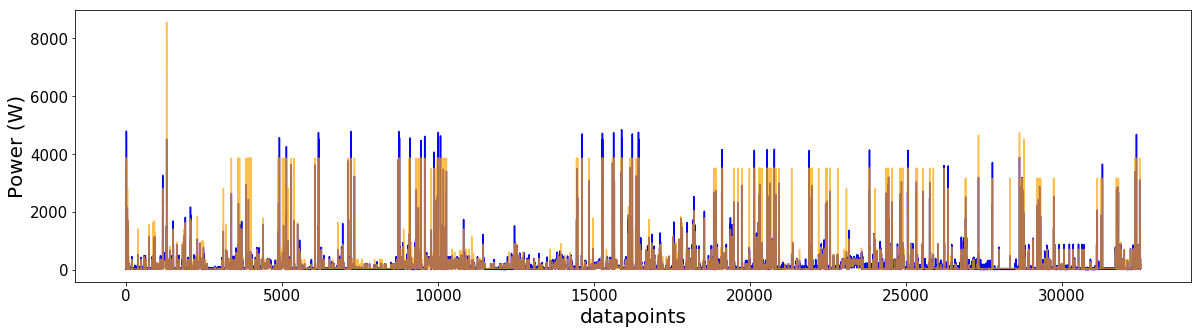

In [20]:
good_quality_jobs = long_jobs[long_jobs['real_pow_quality'] != 0]
plot_line(data_real=good_quality_jobs['real_pow'], data_approx=good_quality_jobs['pred_overAll'])

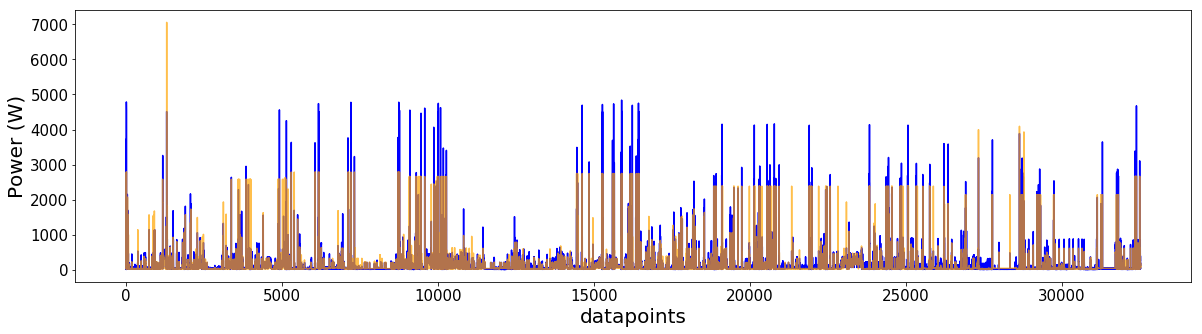

In [21]:
plot_line(data_real=good_quality_jobs['real_pow'], data_approx=good_quality_jobs['pred_perNode'])

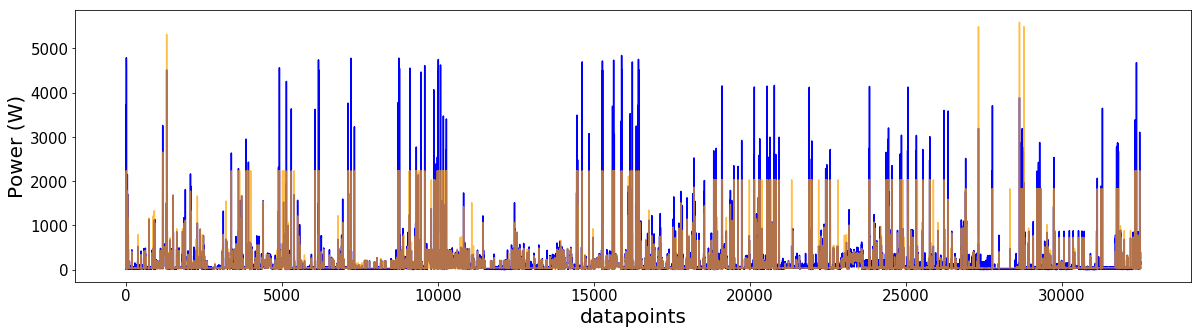

In [22]:
plot_line(data_real=good_quality_jobs['real_pow'], data_approx=good_quality_jobs['pred_user'])

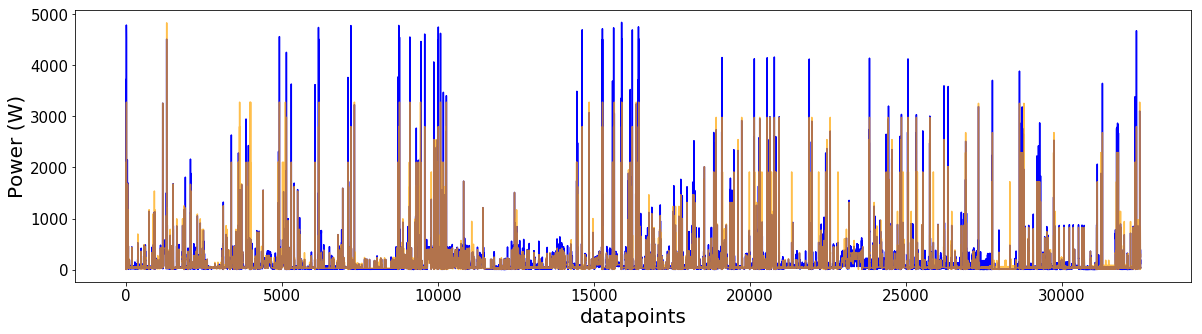

In [23]:
plot_line(data_real=good_quality_jobs['real_pow'], data_approx=good_quality_jobs['pred_userJob'])